# Mobile Price Classification using SVM

In [1]:
# Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [3]:
# Splitting the input features and target variable in the dataset (last column is the target variable)
X = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

## Without Normalization

In [4]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Kernel

In [5]:
# Initializing and training the SVM classifier
svm_classifier_linear1 = SVC(kernel='linear')
svm_classifier_linear1.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Making predictions on the test set
y_pred_linear1 = svm_classifier_linear1.predict(X_test)

In [7]:
# Evaluating the classifier
accuracy_linear1 = accuracy_score(y_test, y_pred_linear1)
print('Accuracy Rate (Without Normalization):',round(accuracy_linear1*100,4),'%')

Accuracy Rate (Without Normalization): 97.0 %


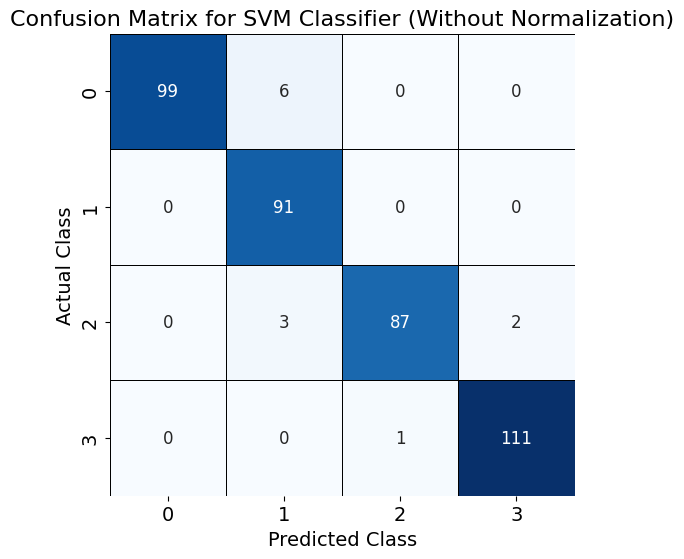

In [8]:
# Generating and plotting the confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred_linear1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_linear1.classes_, yticklabels=svm_classifier_linear1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Polynomial Kernel

In [9]:
# Initializing and training the SVM classifier
svm_classifier_poly1 = SVC(kernel='poly')
svm_classifier_poly1.fit(X_train, y_train)

SVC(kernel='poly')

In [10]:
# Making predictions on the test set
y_pred_poly1 = svm_classifier_poly1.predict(X_test)

In [11]:
# Evaluating the classifier
accuracy_poly1 = accuracy_score(y_test, y_pred_poly1)
print('Accuracy Rate (Without Normalization):',round(accuracy_poly1*100,4),'%')

Accuracy Rate (Without Normalization): 96.25 %


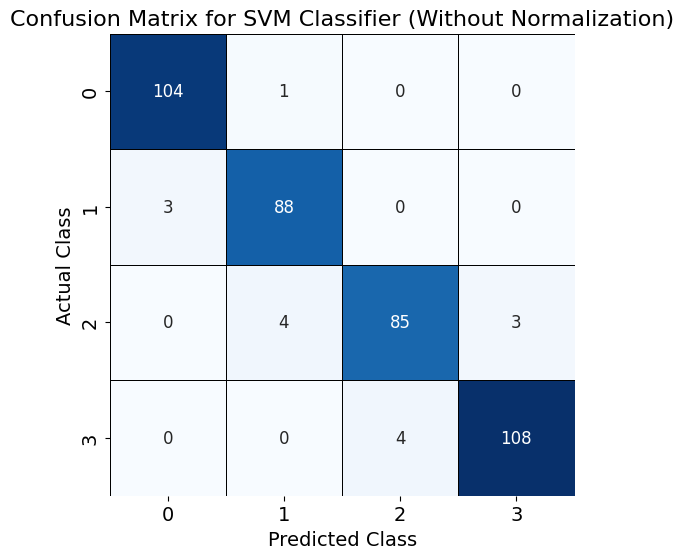

In [12]:
# Generating and plotting the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred_poly1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_poly1.classes_, yticklabels=svm_classifier_poly1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### RBF Kernel

In [13]:
# Initializing and training the SVM classifier
svm_classifier_rbf1 = SVC(kernel='rbf')
svm_classifier_rbf1.fit(X_train, y_train)

SVC()

In [14]:
# Making predictions on the test set
y_pred_rbf1 = svm_classifier_rbf1.predict(X_test)

In [15]:
# Evaluating the classifier
accuracy_rbf1 = accuracy_score(y_test, y_pred_rbf1)
print('Accuracy Rate (Without Normalization):',round(accuracy_rbf1*100,4),'%')

Accuracy Rate (Without Normalization): 96.5 %


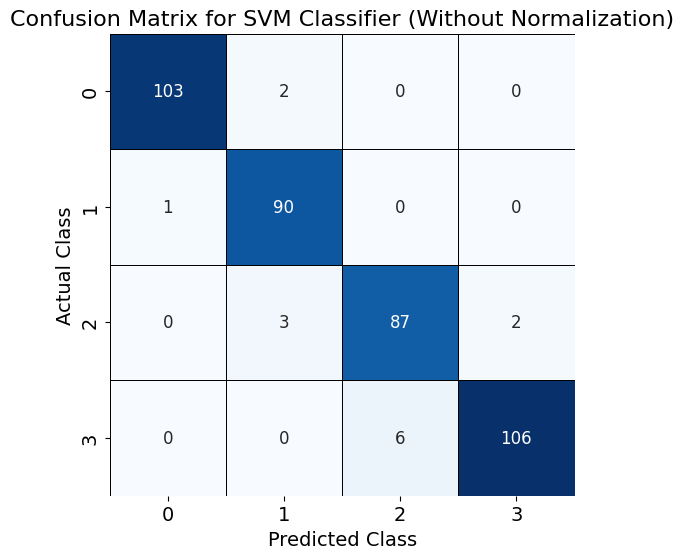

In [16]:
# Generating and plotting the confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred_rbf1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_rbf1.classes_, yticklabels=svm_classifier_rbf1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Sigmoid Kernel

In [17]:
# Initializing and training the SVM classifier
svm_classifier_sig1 = SVC(kernel='sigmoid')
svm_classifier_sig1.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [18]:
# Making predictions on the test set
y_pred_sig1 = svm_classifier_sig1.predict(X_test)

In [19]:
# Evaluating the classifier
accuracy_sig1 = accuracy_score(y_test, y_pred_sig1)
print('Accuracy Rate (Without Normalization):',round(accuracy_sig1*100,4),'%')

Accuracy Rate (Without Normalization): 17.5 %


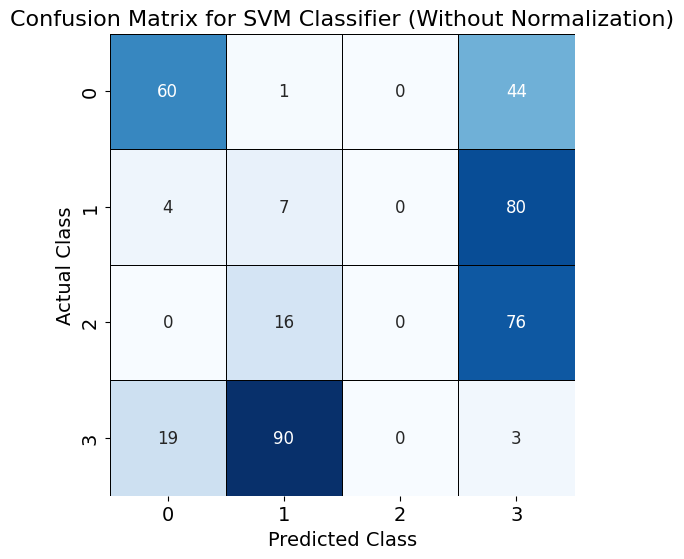

In [20]:
# Generating and plotting the confusion matrix
conf_matrix4 = confusion_matrix(y_test, y_pred_sig1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_sig1.classes_, yticklabels=svm_classifier_sig1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## With Normalization

In [21]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [22]:
# Splitting the dataset into training and testing sets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Linear Kernel

In [23]:
# Initializing and training the SVM classifier
svm_classifier_linear2 = SVC(kernel='linear')
svm_classifier_linear2.fit(X_train_normalized, y_train)

SVC(kernel='linear')

In [24]:
# Making predictions on the test set
y_pred_linear2 = svm_classifier_linear2.predict(X_test_normalized)

In [25]:
# Evaluating the classifier
accuracy_linear2 = accuracy_score(y_test, y_pred_linear2)
print('Accuracy Rate (With Normalization):',round(accuracy_linear2*100,4),'%')

Accuracy Rate (With Normalization): 97.0 %


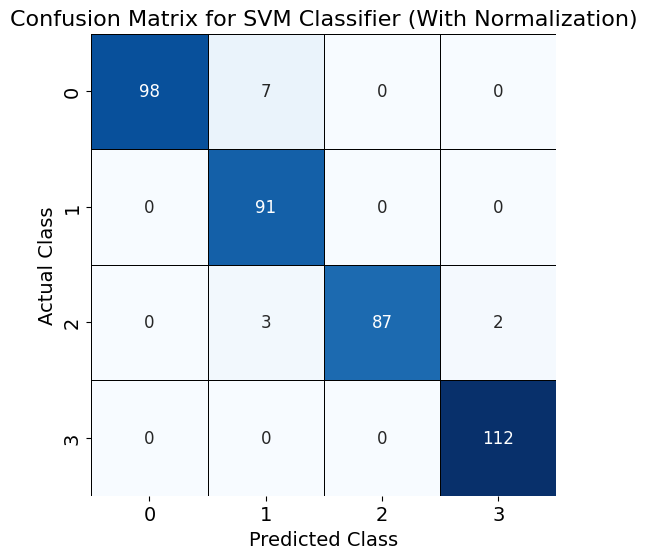

In [26]:
# Generating and plotting the confusion matrix
conf_matrix5 = confusion_matrix(y_test, y_pred_linear2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_linear2.classes_, yticklabels=svm_classifier_linear2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Polynomial Kernel

In [27]:
# Initializing and training the SVM classifier
svm_classifier_poly2 = SVC(kernel='poly')
svm_classifier_poly2.fit(X_train_normalized, y_train)

SVC(kernel='poly')

In [28]:
# Making predictions on the test set
y_pred_poly2 = svm_classifier_poly2.predict(X_test_normalized)

In [29]:
# Evaluating the classifier
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
print('Accuracy Rate (With Normalization):',round(accuracy_poly2*100,4),'%')

Accuracy Rate (With Normalization): 78.75 %


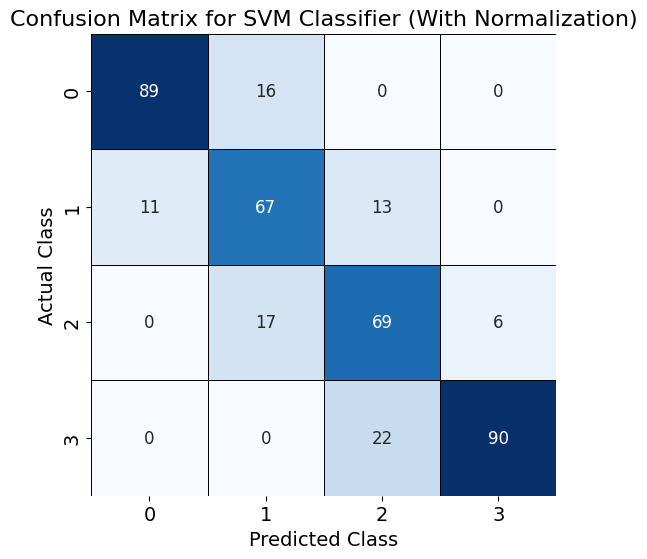

In [30]:
# Generating and plotting the confusion matrix
conf_matrix6 = confusion_matrix(y_test, y_pred_poly2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_poly2.classes_, yticklabels=svm_classifier_poly2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### RBF Kernel

In [31]:
# Initializing and training the SVM classifier
svm_classifier_rbf2 = SVC(kernel='rbf')
svm_classifier_rbf2.fit(X_train_normalized, y_train)

SVC()

In [32]:
# Making predictions on the test set
y_pred_rbf2 = svm_classifier_rbf2.predict(X_test_normalized)

In [33]:
# Evaluating the classifier
accuracy_rbf2 = accuracy_score(y_test, y_pred_rbf2)
print('Accuracy Rate (With Normalization):',round(accuracy_rbf2*100,4),'%')

Accuracy Rate (With Normalization): 89.25 %


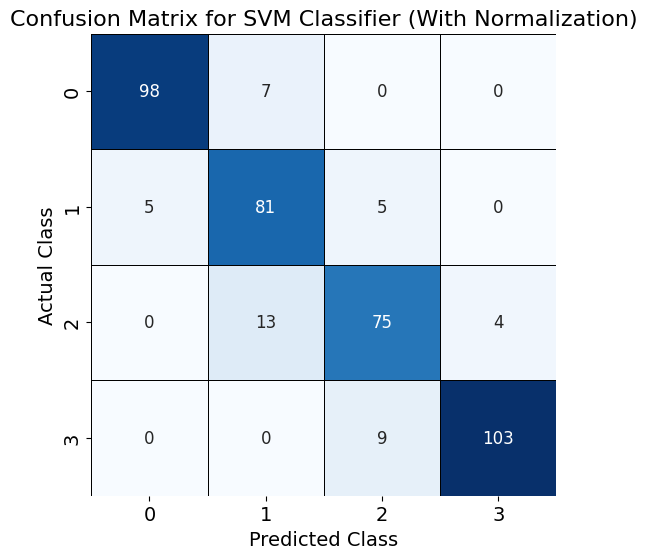

In [34]:
# Generating and plotting the confusion matrix
conf_matrix7 = confusion_matrix(y_test, y_pred_rbf2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_rbf2.classes_, yticklabels=svm_classifier_rbf2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Sigmoid Kernel

In [35]:
# Initializing and training the SVM classifier
svm_classifier_sig2 = SVC(kernel='sigmoid')
svm_classifier_sig2.fit(X_train_normalized, y_train)

SVC(kernel='sigmoid')

In [36]:
# Making predictions on the test set
y_pred_sig2 = svm_classifier_sig2.predict(X_test_normalized)

In [37]:
# Evaluating the classifier
accuracy_sig2 = accuracy_score(y_test, y_pred_sig2)
print('Accuracy Rate (With Normalization):',round(accuracy_sig2*100,4),'%')

Accuracy Rate (With Normalization): 92.25 %


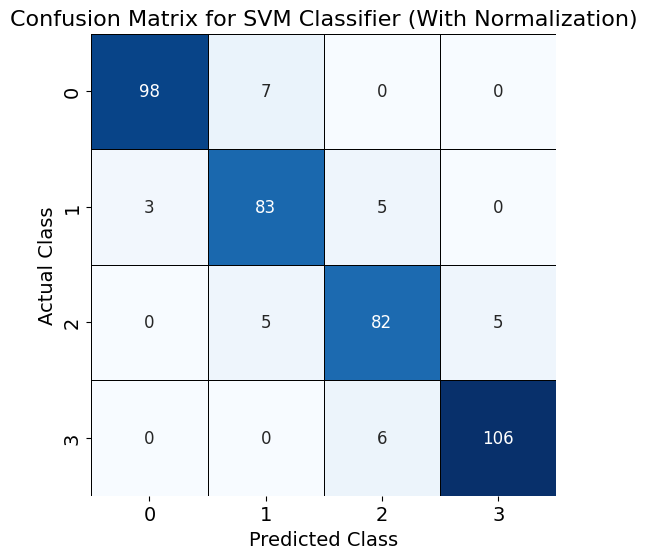

In [38]:
# Generating and plotting the confusion matrix
conf_matrix8 = confusion_matrix(y_test, y_pred_sig2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier_sig2.classes_, yticklabels=svm_classifier_sig2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

***